<a href="https://colab.research.google.com/github/ChihabEddine98/DL_course/blob/main/lec2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports 
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout,MaxPooling2D
from keras.layers import Conv2D
from tensorflow.keras.utils import to_categorical
from keras import Sequential,Input

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Make input daat from 0 to 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
#print(f'{x_train.shape}')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


def CNN():
  model = Sequential([
                      Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = (28,28,1)),
                      Conv2D(64, kernel_size=(3, 3), activation='relu'),
                      MaxPooling2D(pool_size=(2,2)),
                      Dropout(0.2),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dropout(0.5),
                      Dense(10, activation='softmax')
                      ]
                      )
  
  model.compile(loss = 'categorical_crossentropy', optimizer= 'adam',metrics =['acc' , 'mse'])
  return model


def train(model):
  with tf.device('/device:GPU:0'):
      history = model.fit(x_train,y_train ,
                          batch_size = 256,
                          epochs = 10,
                          verbose = 1,
                          validation_split = 0.1)
            
  return history.history

def score(model):
  return model.evaluate(x_test,y_test,verbose=0)

print(x_train.shape)
model = CNN()
model.summary()

(60000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1

In [3]:
history = train(model)

Epoch 1/10
211/211 [==============================] - 7s 25ms/step - loss: 0.3251 - acc: 0.9010 - mse: 0.0145 - val_loss: 0.0595 - val_acc: 0.9835 - val_mse: 0.0025
Epoch 2/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0956 - acc: 0.9712 - mse: 0.0045 - val_loss: 0.0440 - val_acc: 0.9877 - val_mse: 0.0019
Epoch 3/10
211/211 [==============================] - 5s 24ms/step - loss: 0.0718 - acc: 0.9787 - mse: 0.0033 - val_loss: 0.0393 - val_acc: 0.9880 - val_mse: 0.0017
Epoch 4/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0581 - acc: 0.9819 - mse: 0.0028 - val_loss: 0.0339 - val_acc: 0.9913 - val_mse: 0.0014
Epoch 5/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0474 - acc: 0.9851 - mse: 0.0023 - val_loss: 0.0387 - val_acc: 0.9902 - val_mse: 0.0015
Epoch 6/10
211/211 [==============================] - 5s 23ms/step - loss: 0.0411 - acc: 0.9871 - mse: 0.0020 - val_loss: 0.0327 - val_acc: 0.9917 - val_mse: 0.0013
Epoch 7/10

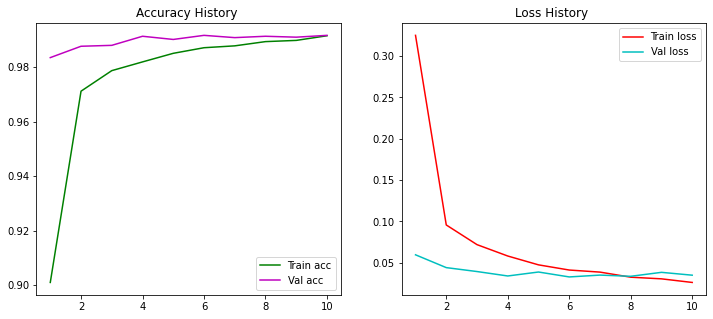

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


def plots(epochs , history):
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches((12,5))
    ax[0].plot(epochs, history['acc'] , 'g' , label = 'Train acc')
    ax[0].plot(epochs, history['val_acc'],'m',label = 'Val acc')
    ax[0].set_title('Accuracy History ')
    ax[0].legend()

    ax[1].plot(epochs, history['loss'] , 'r',label = 'Train loss')
    ax[1].plot(epochs, history['val_loss'],'c',label = 'Val loss')
    ax[1].set_title('Loss History ')
    ax[1].legend()

    fig.show()


epochs = range(1,11)
plots(epochs,history)





In [9]:
acc = score(model)
print(f' Test Score [Accuracy]: {acc[1]*100:.2f}%')

 Test Score [Accuracy]: 99.09%
